<a href="https://colab.research.google.com/github/Shils123/Project1/blob/main/K_Mode%2BBank%2BMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Mode Clustering on Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
help(KModes)

Help on class KModes in module kmodes.kmodes:

class KModes(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  KModes(n_clusters=8, max_iter=100, cat_dissim=<function matching_dissim at 0x7f1ee6940550>, init='Cao', n_init=10, verbose=0, random_state=None, n_jobs=1)
 |  
 |  k-modes clustering algorithm for categorical data.
 |  
 |  Parameters
 |  -----------
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 100
 |      Maximum number of iterations of the k-modes algorithm for a
 |      single run.
 |  
 |  cat_dissim : func, default: matching_dissim
 |      Dissimilarity function used by the k-modes algorithm for categorical variables.
 |      Defaults to the matching dissimilarity function.
 |  
 |  init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
 |      Method for initialization:
 |      'Huang': Method in Huang [1997, 1998]
 |      'Cao':

In [ ]:
# read the dataset
bank = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/bankmarketing.csv")

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [ ]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [ ]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [ ]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [ ]:
bank_cust  = bank_cust.drop('age',axis = 1)

In [ ]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [ ]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [ ]:
# Checking the count per category
job_df = pd.DataFrame(bank_cust['job'].value_counts())
job_df

,job
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060
unemployed,1014


<Axes: ylabel='job'>

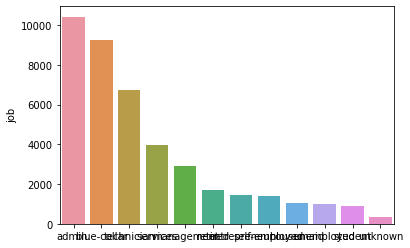

In [ ]:
sns.barplot(x=job_df.index, y=job_df['job'])

In [ ]:
# Checking the count per category
age_df = pd.DataFrame(bank_cust['age_bin'].value_counts())

<Axes: ylabel='age_bin'>

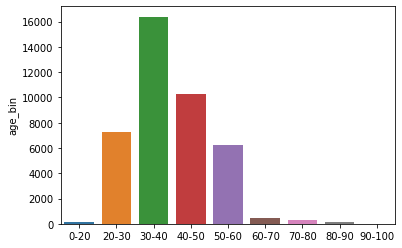

In [ ]:
sns.barplot(x=age_df.index, y=age_df['age_bin'])

## Using K-Mode with "Cao" initialization

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [ ]:
# Predicted Clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [ ]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


## Using K-Mode with "Huang" initialization

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11408, cost: 234486.0


In [ ]:
# Predicted clusters
fitClusters_huang

array([0, 0, 1, ..., 0, 0, 1], dtype=uint16)

## Choosing K by comparing Cost against each K

In [ ]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 256193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5191, cost: 231253.0
Run 1, iteration: 2/100, moves: 960, cost: 231253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4897, cost: 219928.0
Run 1, iteration: 2/100, moves: 5790, cost: 219928.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 220854.0


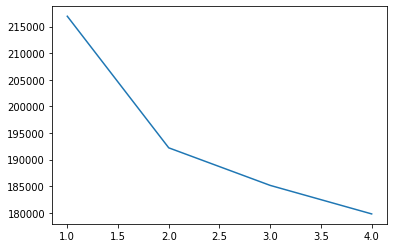

In [ ]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [ ]:
## Choosing K=2

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [ ]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [ ]:
bank_cust = bank_cust.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,3,1,0,0,0,0,1,6,1,1,4,1
1,7,1,3,1,0,0,1,6,1,1,4,1
2,7,1,3,0,2,0,1,6,1,1,2,0
3,0,1,1,0,0,0,1,6,1,1,2,0
4,7,1,3,0,0,2,1,6,1,1,4,1


In [ ]:
# Data for Cluster1
cluster1 = combinedDf[combinedDf.cluster_predicted==1]

In [ ]:
# Data for Cluster0
cluster0 = combinedDf[combinedDf.cluster_predicted==0]

In [ ]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                12895 non-null  int64 
 1   marital            12895 non-null  int64 
 2   education          12895 non-null  int64 
 3   default            12895 non-null  int64 
 4   housing            12895 non-null  int64 
 5   loan               12895 non-null  int64 
 6   contact            12895 non-null  int64 
 7   month              12895 non-null  int64 
 8   day_of_week        12895 non-null  int64 
 9   poutcome           12895 non-null  int64 
 10  age_bin            12895 non-null  int64 
 11  cluster_predicted  12895 non-null  uint16
dtypes: int64(11), uint16(1)
memory usage: 1.2 MB


In [ ]:
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                28293 non-null  int64 
 1   marital            28293 non-null  int64 
 2   education          28293 non-null  int64 
 3   default            28293 non-null  int64 
 4   housing            28293 non-null  int64 
 5   loan               28293 non-null  int64 
 6   contact            28293 non-null  int64 
 7   month              28293 non-null  int64 
 8   day_of_week        28293 non-null  int64 
 9   poutcome           28293 non-null  int64 
 10  age_bin            28293 non-null  int64 
 11  cluster_predicted  28293 non-null  uint16
dtypes: int64(11), uint16(1)
memory usage: 2.6 MB


In [ ]:
# Checking the count per category for JOB
job1_df = pd.DataFrame(cluster1['job'].value_counts())
job0_df = pd.DataFrame(cluster0['job'].value_counts())

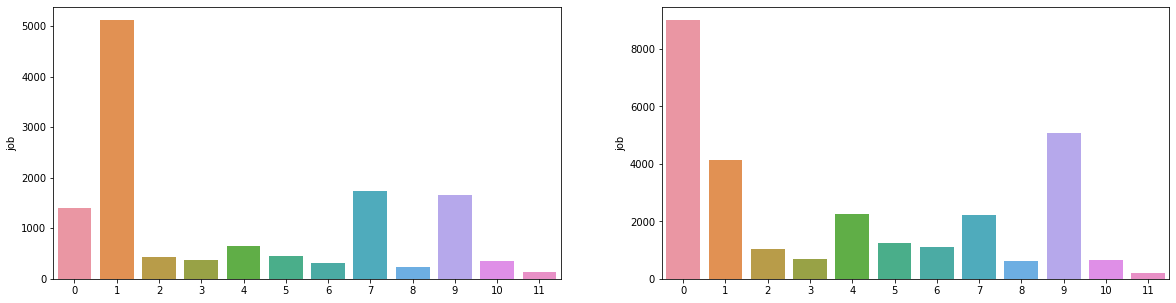

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=job1_df.index, y=job1_df['job'], ax=ax[0])
sns.barplot(x=job0_df.index, y=job0_df['job'], ax=ax[1])
fig.show()

In [ ]:
age1_df = pd.DataFrame(cluster1['age_bin'].value_counts())
age0_df = pd.DataFrame(cluster0['age_bin'].value_counts())

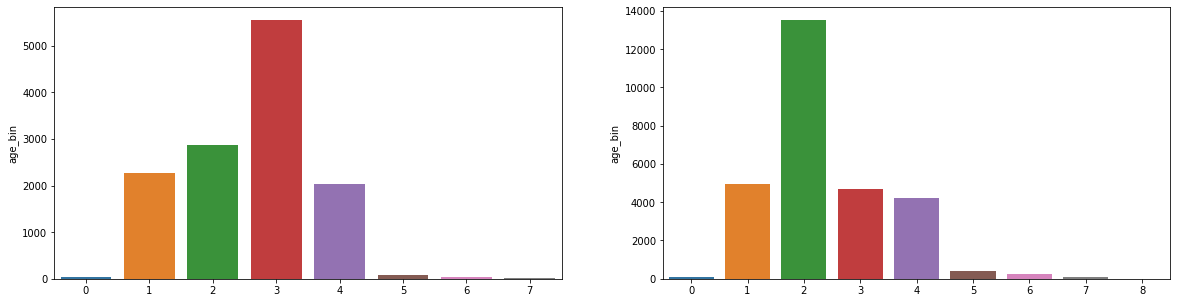

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index, y=age1_df['age_bin'], ax=ax[0])
sns.barplot(x=age0_df.index, y=age0_df['age_bin'], ax=ax[1])
fig.show()

In [ ]:
print(cluster1['marital'].value_counts())
print(cluster0['marital'].value_counts())

1    8636
2    2732
0    1501
3      26
Name: marital, dtype: int64
1    16292
2     8836
0     3111
3       54
Name: marital, dtype: int64


In [ ]:
print(cluster1['education'].value_counts())
print(cluster0['education'].value_counts())

3    4186
2    2572
0    1981
5    1459
1    1033
6     977
7     680
4       7
Name: education, dtype: int64
6    11191
3     5329
5     3784
2     3473
0     2195
1     1259
7     1051
4       11
Name: education, dtype: int64
